In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

#main 폴더로 이동, 폴더에 맞게 수정 필요

In [4]:
cd /content/drive/MyDrive/main

/content/drive/MyDrive/main


In [5]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 46.0 MB/s eta 0:00:00


In [7]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 823.7 kB/s eta 0:00:00


In [10]:
!pip install pyheif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 5.0 MB/s eta 0:00:00


In [13]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.7 MB/s eta 0:00:00


In [14]:
import argparse
from seg_model import *
from segmentation import remove_background, detect, heic_to_jpeg
from CLSmodule import *
from classification import classify_hand_image

In [25]:
image_path = './image/sample6.jpg'
base_name, ext = os.path.splitext(os.path.basename(image_path))
if ext.lower() == '.heic': #확장자 통일
    jpg_path = os.path.join(os.path.dirname(image_path), f"{base_name}.jpg")
    heic_to_jpeg(image_path, jpg_path)
    image_path = jpg_path

device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')

model = UNet(n_channels=3, n_classes=1).to(device)
model.load_state_dict(torch.load('./segmentation_best_model.pth'))
model.eval()

bg_removed = f"{base_name}_bg{ext}"
bg_removed_path = os.path.join(os.path.dirname(image_path), bg_removed)


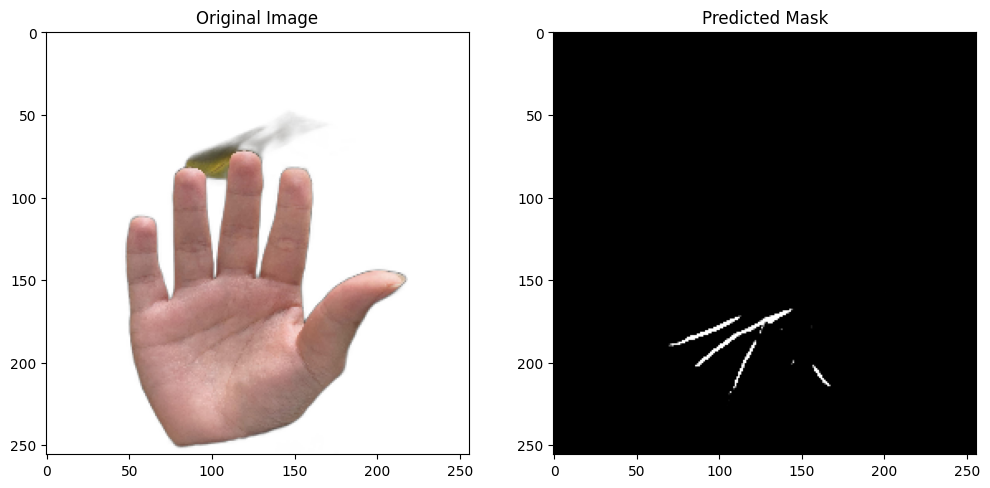

1/1 [==============================] - 1s 776ms/step
head: 0
life: 0
heart: 1
당신은 감정과 정서가 섬세하고 예민하며 감성이 풍부한 사람일 가능성이 크다.
또한, 영리하고 정신 집중력이 뛰어나다.
그리고, 조심성이 많고 타인에게 의지하는 성향이 있다.


<Figure size 640x480 with 0 Axes>

In [27]:
mask_image = f"{base_name}_mask{ext}"
mask_path = f'./mask/{mask_image}'
#segmentation 실행
remove_background(image_path, bg_removed_path)
detect(bg_removed_path, mask_path, model , device, True)

#classification 실행
(head_pred_class, life_pred_class, heart_pred_class) = classify_hand_image(bg_removed_path, mask_path)

heart_line_interpretation = ["활동력이 풍부하며 정이 많고 열정적이며 관대한 사람일 것이다.", "감정과 정서가 섬세하고 예민하며 감성이 풍부한 사람일 가능성이 크다."]
head_line_interpretation = ["영리하고 정신 집중력이 뛰어나다.", "지적 욕망이 강하고 섬세하며 관심영역이 넓고 재능이 많다."]
life_line_interpretation = ["조심성이 많고 타인에게 의지하는 성향이 있다.", "독립적이며 모험적인 성향을 나타낸다."]

# 최종 해석 결과 출력
print("="*100)
print(f"당신은 {heart_line_interpretation[heart_pred_class]}")
print(f"또한, {head_line_interpretation[head_pred_class]}")
print(f"그리고, {life_line_interpretation[life_pred_class]}")
print("="*100)
